In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# Load data
df = pd.read_csv('Fifa2019.csv')
df.head()

Overall Position  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0       94       RF        84         95               70            90   
1       94       ST        84         94               89            81   
2       92       LW        79         87               62            84   
3       91       GK        17         13               21            50   
4       91      RCM        93         82               55            92   

   Volleys  Dribbling  Curve  FKAccuracy     ...      Penalties  Composure  \
0       86         97     93          94     ...             75         96   
1       87         88     81          76     ...             85         95   
2       84         96     88          87     ...             81         94   
3       13         18     21          19     ...             40         68   
4       82         86     85          83     ...             79         88   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0       33              28             26         6          11         15   
1       28              31             23         7          11         15   
2       27              24             33         9           9         15   
3       15              21             13        90          85         87   
4       68              58             51        15          13          5   

   GKPositioning  GKReflexes  
0             14           8  
1             14          11  
2             15          11  
3             88          94  
4             10          13  

[5 rows x 36 columns]

In [21]:
# Number of rows and columns
df.shape

(18147, 36)

In [22]:
# Missing value
df.isnull().values.any()

False

In [6]:
df.describe()

Overall      Crossing     Finishing  HeadingAccuracy  \
count  18147.000000  18147.000000  18147.000000     18147.000000   
mean      66.253926     49.738414     45.550229        52.300766   
std        6.913320     18.364255     19.527445        17.381753   
min       46.000000      5.000000      2.000000         4.000000   
25%       62.000000     38.000000     30.000000        44.000000   
50%       66.000000     54.000000     49.000000        56.000000   
75%       71.000000     64.000000     62.000000        64.000000   
max       94.000000     93.000000     95.000000        94.000000   

       ShortPassing       Volleys     Dribbling         Curve    FKAccuracy  \
count  18147.000000  18147.000000  18147.000000  18147.000000  18147.000000   
mean      58.695432     42.912217     55.375158     47.176283     42.866038   
std       14.696075     17.695900     18.912224     18.396009     17.480034   
min        7.000000      4.000000      4.000000      6.000000      3.000000   
25%       54.000000     30.000000     49.000000     34.000000     31.000000   
50%       62.000000     44.000000     61.000000     48.000000     41.000000   
75%       68.000000     57.000000     68.000000     62.000000     57.000000   
max       93.000000     90.000000     97.000000     94.000000     94.000000   

        LongPassing      ...          Penalties     Composure       Marking  \
count  18147.000000      ...       18147.000000  18147.000000  18147.000000   
mean      52.721386      ...          48.546371     58.651127     47.286053   
std       15.325211      ...          15.703113     11.437138     19.900450   
min        9.000000      ...           5.000000      3.000000      3.000000   
25%       43.000000      ...          39.000000     51.000000     30.000000   
50%       56.000000      ...          49.000000     60.000000     53.000000   
75%       64.000000      ...          60.000000     67.000000     64.000000   
max       93.000000      ...          92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18147.000000   18147.000000  18147.000000  18147.000000   
mean        47.701879      45.666336     16.616906     16.393839   
std         21.663630      21.287961     17.698612     16.909971   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18147.000000   18147.000000  18147.000000  
mean      16.233041      16.389651     16.712019  
std       16.504103      17.037031     17.957521  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 35 columns]

In [23]:
df.dtypes

Overall             int64
Position           object
Crossing            int64
Finishing           int64
HeadingAccuracy     int64
ShortPassing        int64
Volleys             int64
Dribbling           int64
Curve               int64
FKAccuracy          int64
LongPassing         int64
BallControl         int64
Acceleration        int64
SprintSpeed         int64
Agility             int64
Reactions           int64
Balance             int64
ShotPower           int64
Jumping             int64
Stamina             int64
Strength            int64
LongShots           int64
Aggression          int64
Interceptions       int64
Positioning         int64
Vision              int64
Penalties           int64
Composure           int64
Marking             int64
StandingTackle      int64
SlidingTackle       int64
GKDiving            int64
GKHandling          int64
GKKicking           int64
GKPositioning       int64
GKReflexes          int64
dtype: object

The 34 performance scores and overall score are integer. Position is object. Looks good.

In [24]:
df.isnull().sum()

Overall            0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6864ab8208>,
      dtype=object)

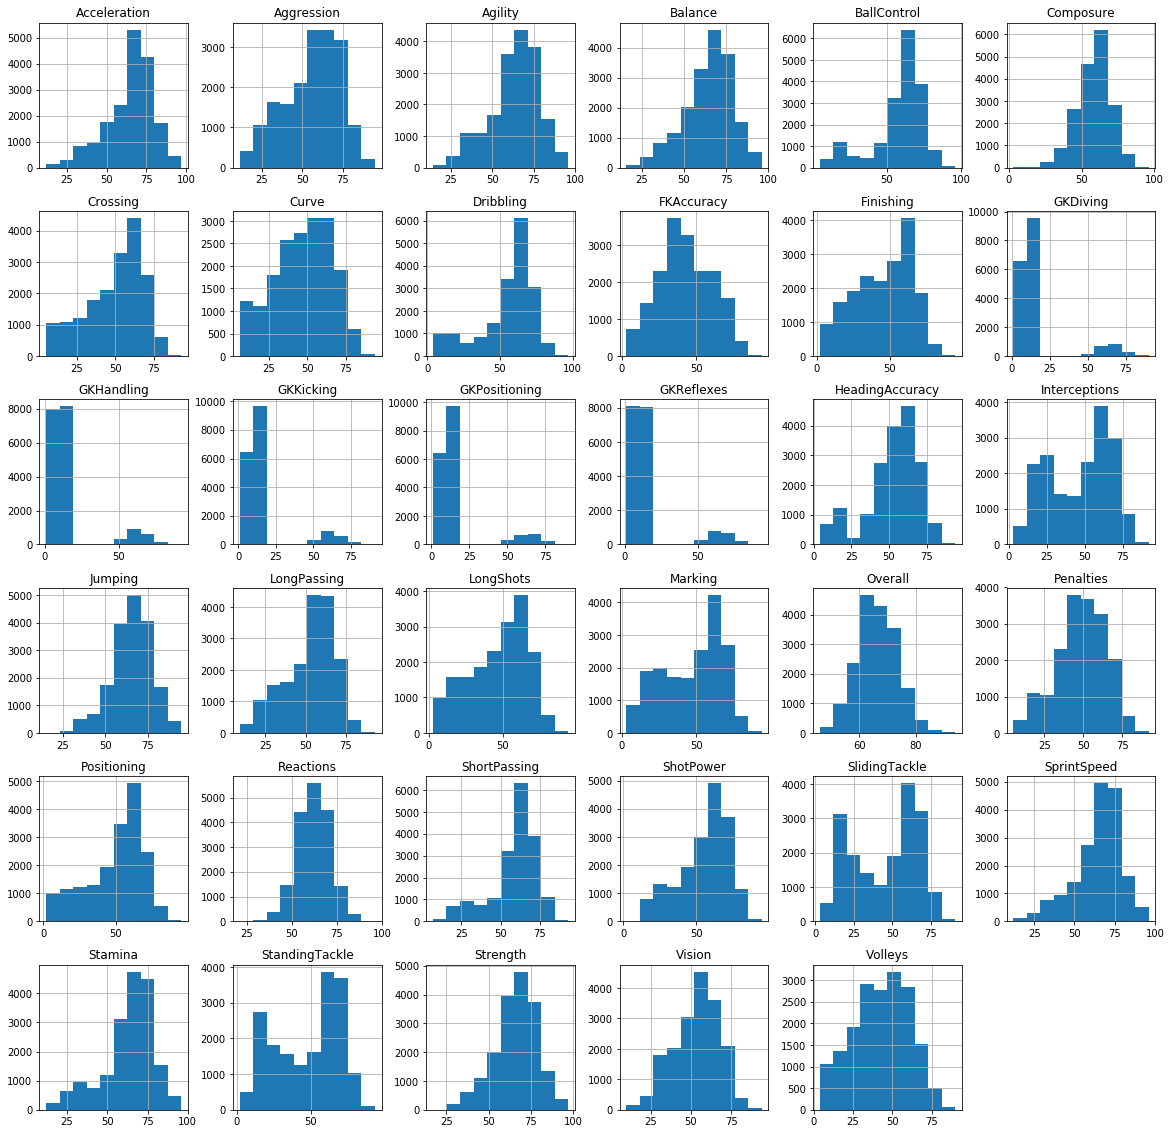

In [25]:
# histogram of variables 
df.hist(figsize = (20, 20))

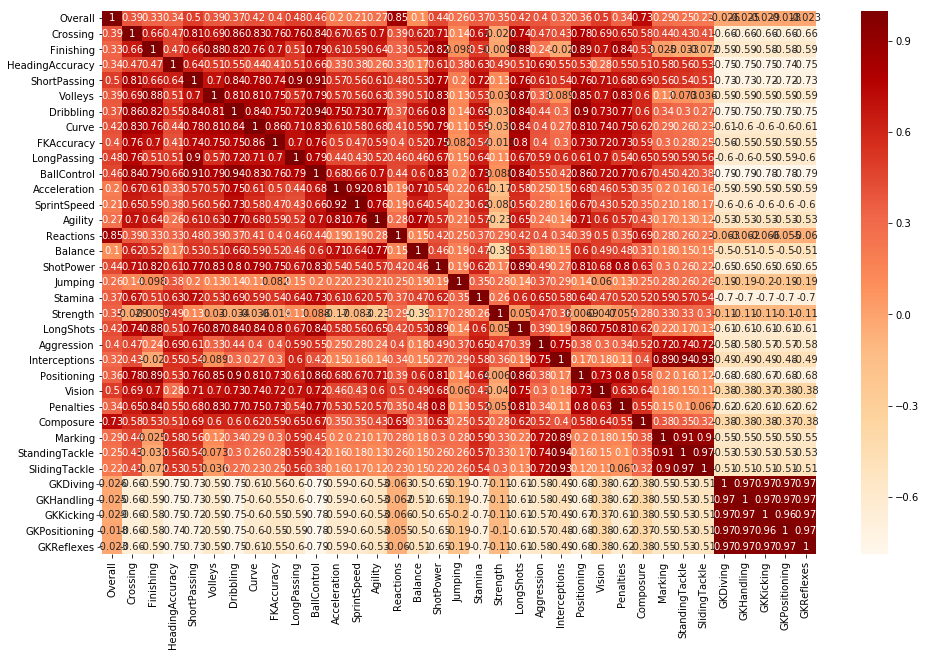

In [26]:
ax, fig = plt.subplots(figsize = (16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True, cmap = "OrRd")
plt.show()

We can see "GKDiving", "GKHanding", "GKKicking", "GKPositioning" and "GKReflexes" are not correlated with "overall", so we remove these 5 variables. 
Also remove "Position" as it is a categorical variable, not relevant with linear regression.

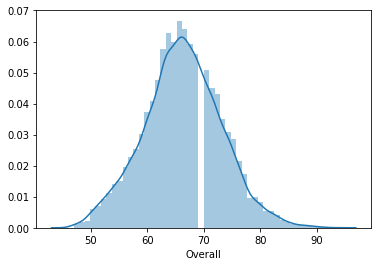

In [27]:
sns.distplot(df["Overall"])

We can see "Overall" is distributed normally

In [29]:
# Trainning x
x = df.drop(["GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes", "Position", "Overall"], axis = 1)
x.head()

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0        84         95               70            90       86         97   
1        84         94               89            81       87         88   
2        79         87               62            84       84         96   
3        17         13               21            50       13         18   
4        93         82               55            92       82         86   

   Curve  FKAccuracy  LongPassing  BallControl      ...        LongShots  \
0     93          94           87           96      ...               94   
1     81          76           77           94      ...               93   
2     88          87           78           95      ...               82   
3     21          19           51           42      ...               12   
4     85          83           91           91      ...               91   

   Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
0          48             22           94      94         75         96   
1          63             29           95      82         85         95   
2          56             36           89      87         81         94   
3          38             30           12      68         40         68   
4          76             61           87      94         79         88   

   Marking  StandingTackle  SlidingTackle  
0       33              28             26  
1       28              31             23  
2       27              24             33  
3       15              21             13  
4       68              58             51  

[5 rows x 29 columns]

In [33]:
# Trainning y
y = df["Overall"]
y.head()

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64

In [34]:
# Random split data to training data and test data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [35]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# See the coef
model.coef_

array([ 0.02897635,  0.01155628, -0.02328635,  0.04407696, -0.00757147,
       -0.0199047 ,  0.01371013, -0.00725124,  0.00461636,  0.05702102,
        0.03272752,  0.00913072,  0.00175858,  0.4770131 , -0.05259346,
        0.02032851,  0.02937046, -0.01012715,  0.06262786, -0.00756766,
       -0.0138845 , -0.0101297 , -0.08693201,  0.0288479 , -0.01612582,
        0.1561925 ,  0.00805544,  0.00336176, -0.02875714])

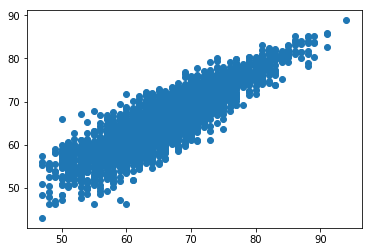

In [37]:
#scatter plot of predicted value and the response
predicted = model.predict(test_x)
plt.scatter(test_y, predicted)

In [38]:
# Predicting score
model.score(test_x, test_y)

0.7909877204574101

If we only intresting of predicting RDM or RCM in Position, firstly we subset the data, then fit random forest model

In [68]:
df1 = df.loc[(df["Position"] == "RDM") | (df["Position"] =="RCM")]
df1.head()
df1.shape

(639, 36)

In [69]:
# Lets fit a random forest model to predict Position
# Split trainning and testing data

xx = df1.drop(["Position", "Overall"], axis=1)
yy = df1["Position"]
train_x, test_x, train_y, test_y = train_test_split(xx, yy, test_size=0.3, random_state=42)

In [70]:
train_x.shape

(447, 34)

In [71]:
test_x.shape

(192, 34)

In [72]:
test_y.head()

1564     RCM
6914     RCM
13193    RCM
3743     RDM
16323    RCM
Name: Position, dtype: object

In [73]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=13)
model2.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [74]:
# Predicting score
predicted2 = model2.predict(test_x)
model2.score(test_x, test_y)

0.6614583333333334

In [76]:
from sklearn.metrics import roc_auc_score
probabilities = model2.predict_proba(test_x)

In [77]:
# ROC score
roc_auc_score(test_y, probabilities[:, 1])

0.6583829592304169

In [78]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted2)

array([[93, 25],
       [40, 34]])

Our model is not a very good model, accuracy and roc scores are around 0.66 maybe we could try different model such as multinomial, LDA, QDA, regression tree, etc.